In [20]:
import numpy as np

def phase9_final_output(S, threshold_ratio=0.8):

    threshold = threshold_ratio * np.max(S)

    final_detection = (S > threshold).astype(np.uint8)

    return final_detection


Images loaded: 50
Frame 0 shape: (256, 256)
Frame 1 shape: (256, 256)
Frame 2 shape: (256, 256)
Frame 3 shape: (256, 256)
Frame 4 shape: (256, 256)
Frame 5 shape: (256, 256)
Frame 6 shape: (256, 256)
Frame 7 shape: (256, 256)
Frame 8 shape: (256, 256)
Frame 9 shape: (256, 256)


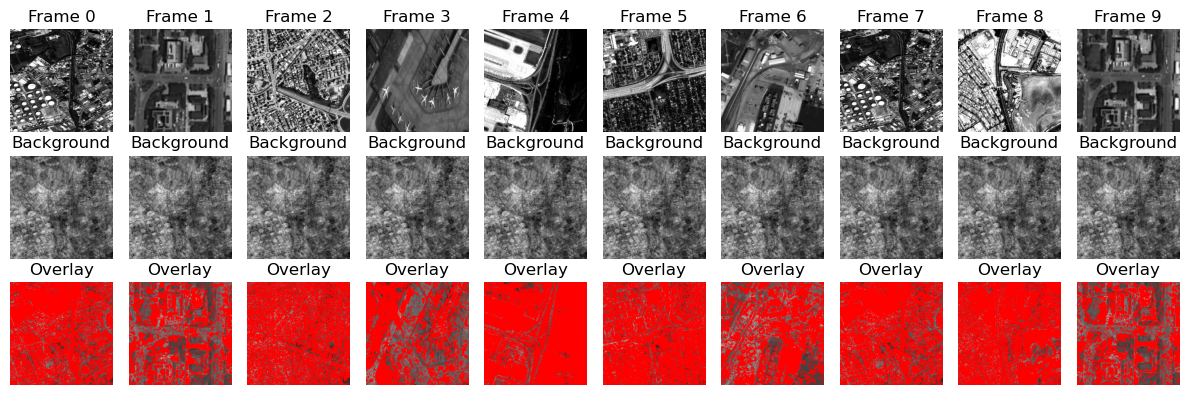

In [21]:
%run "phase4_sparse.ipynb"
%run "phase5_labels.ipynb"
%run "phase6_refine.ipynb"
%run "phase7_evolve.ipynb"
%run "phase8_feedback.ipynb"

In [22]:
S = phase4_sparse_optimization(frames)

S_initial = S.copy()   


In [23]:
for _ in range(2):
    L0 = phase5_initial_labels(S)
    L1 = phase6_refine_labels(L0)
    S  = phase8_feedback_sparse(S, L1)



In [24]:
final_detection = phase9_final_output(S)

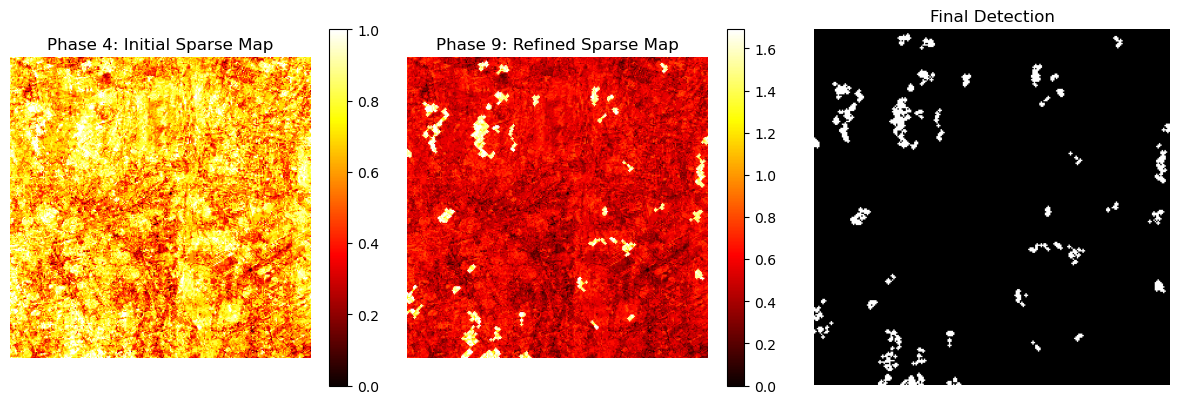

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Phase 4: Initial Sparse Map")
plt.imshow(S_initial, cmap='hot')
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Phase 9: Refined Sparse Map")
plt.imshow(S, cmap='hot')
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Final Detection")
plt.imshow(final_detection, cmap='gray')

plt.axis('off')

plt.tight_layout()
plt.show()


Sparsity histogram comparison

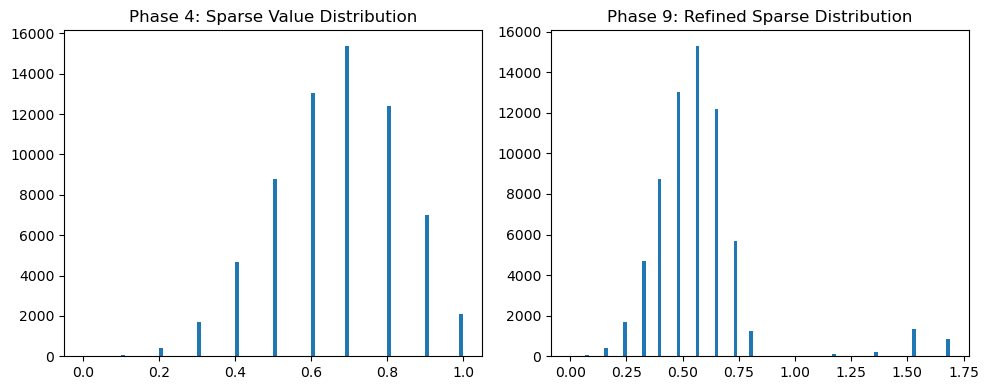

In [26]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(S_initial.flatten(), bins=100)
plt.title("Phase 4: Sparse Value Distribution")

plt.subplot(1,2,2)
plt.hist(S.flatten(), bins=100)
plt.title("Phase 9: Refined Sparse Distribution")

plt.tight_layout()
plt.show()


Show Difference (Residual Map)

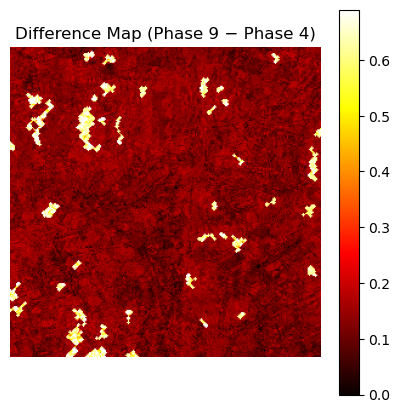

In [27]:
difference = np.abs(S - S_initial)

plt.figure(figsize=(5,5))
plt.imshow(difference, cmap='hot')
plt.colorbar()
plt.title("Difference Map (Phase 9 − Phase 4)")
plt.axis('off')
plt.show()

Sparsity ratio

In [33]:
thr4 = 0.3 * np.max(S_initial)
thr9 = 0.3 * np.max(S)

print("Phase 4:", np.mean(S_initial > thr4))
print("Phase 9:", np.mean(S > thr9))


Phase 4: 0.96710205078125
Phase 9: 0.5634307861328125


Overlay both on the original image

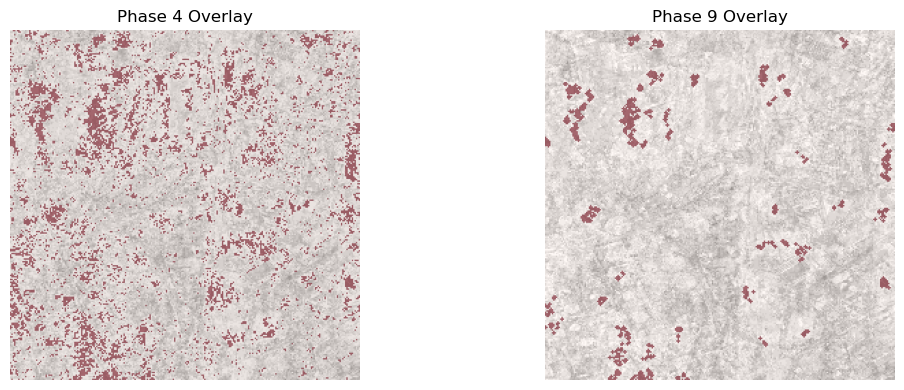

In [30]:
original_image = S_initial  # یا I0 یا frame0

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.imshow(S_initial > np.max(S_initial)*0.8, cmap='Reds', alpha=0.6)
plt.title("Phase 4 Overlay")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(original_image, cmap='gray')
plt.imshow(S > np.max(S)*0.8, cmap='Reds', alpha=0.6)
plt.title("Phase 9 Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()
